In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr

matplotlib.rcParams.update({'font.size': 14})
import dedalus.public as d3

import logging
logging.disable()

In [3]:
from frontal_zone import *

In [4]:
dsM = xr.open_dataarray("../../data/growth_rates/frontal_strength_M.nc")

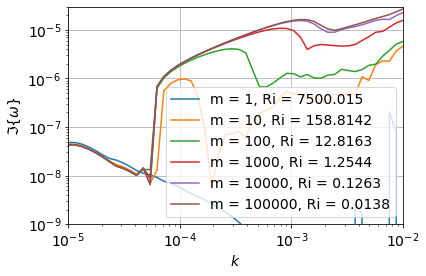

In [14]:

for M in dsM.M:
    m = calc_m_from_M(M, calc_Mc(N, θ)).values
    if m==np.inf:
        m = 1e5
    Ri = calc_Ri(N, M, θ, f).values
    Bzv = N**2 - M.values**2*np.tan(θ)**-1
    Ld = np.sqrt(Bzv)*H/f
    plt.plot(
        dsM.wavenumber, dsM.sel(M=M),
        label=f"m = {np.int64(np.round(m, 0))}, Ri = {np.round(Ri, 4)}"
    )
plt.xlim(1e-5, 1e-2)
plt.ylim(1e-9, 3e-5)
plt.xlabel(r"$k$")
plt.ylabel(r"$\Im\{\omega\}$")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.title("");
plt.legend()

In [198]:
ds = xr.open_dataset("../../data/growth_rates/friction.nc")
dsM = xr.open_dataarray("../../data/growth_rates/frontal_strength_M.nc")

In [199]:
def calc_MfromRi(Ri, N, f, θ):
    return np.sqrt(
        (-f**2*np.tan(θ)**-1 + np.sqrt(f**4*np.tan(θ)**-2 + 4*Ri*f**2*N**2))
        / (2*Ri)
    )

In [200]:
def calc_Ri(N, M, θ, f):
    Bzv = N**2 - M**2*np.tan(θ)**-1
    Bxh = M**2
    Vzv = Bxh/f
    return Bzv/(Vzv**2)

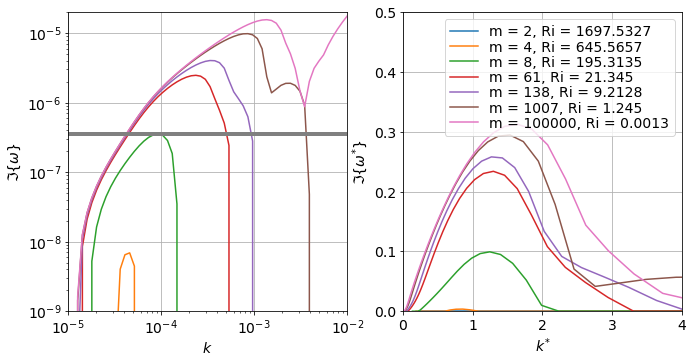

In [220]:
plt.figure(figsize=(11,5.5))

plt.subplot(1,2,1)
for M in dsM.M:
    m = calc_m(M, calc_Mc(N, θ)).values
    if m==np.inf:
        m = 1e5
    Ri = calc_Ri(N, M, θ, f).values
    Bzv = N**2 - M.values**2*np.tan(θ)**-1
    Ld = np.sqrt(Bzv)*H/f
    plt.plot(
        ds.wavenumber, dsM.sel(M=M),
        label=f"m = {np.int64(np.round(m, 0))}, Ri = {np.round(Ri, 4)}"
    )
plt.xlim(1e-5, 1e-2)
plt.ylim(1e-9, 2e-5)
plt.axhline(2*np.pi*κ1/(Hbfz**2), label="frictional damping rate", color="grey", lw=4.)
plt.xlabel(r"$k$")
plt.ylabel(r"$\Im\{\omega\}$")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.title("");

plt.subplot(1,2,2)
for M in dsM.M:
    m = calc_m(M, calc_Mc(N, θ)).values
    if m==np.inf:
        m = 1e5
    Ri = calc_Ri(N, M, θ, f).values
    Bzv = N**2 - M.values**2*np.tan(θ)**-1
    Ld = np.sqrt(Bzv)*H/f
    plt.plot(
        ds.wavenumber * Ld * np.sqrt(1 + 1./Ri), dsM.sel(M=M)/f / np.sqrt( (1. + Ri)**-1 ),
        label=f"m = {np.int64(np.round(m, 0))}, Ri = {np.round(Ri, 4)}"
    )
plt.xlabel(r"$k^{*}$")
plt.ylabel(r"$\Im\{\omega^{*}\}$")
plt.xlim(0, 4)
plt.ylim(0., 0.5)
plt.legend(labelspacing=0.09)
plt.grid(True)
plt.title("");

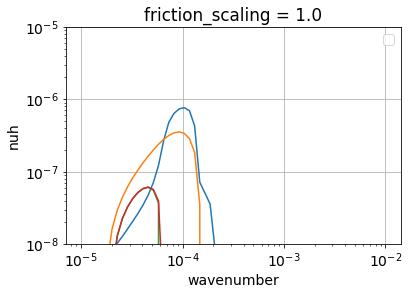

In [204]:
ds['k0_only'].sel(friction_scaling=1).plot()
ds['k1'].sel(friction_scaling=1).plot()
ds['viscous'].plot()
ds['nuh'].sel(friction_scaling=1).plot()
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-8, 1e-5)
plt.legend()
plt.grid(True)

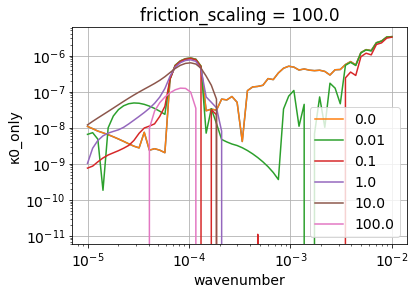

In [10]:
gr['inviscid'].plot()
plt.xscale("log")
plt.yscale("log")
for sc in friction_scalings:
    gr['κ0_only'].sel(friction_scaling=sc).plot(label=f"{sc}")
    
plt.legend()
plt.grid(True)